In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv", index_col="id")
train.shape

(381109, 11)

In [3]:
test = pd.read_csv("data/test.csv", index_col="id")
test.shape

(127037, 10)

In [4]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
set(train.columns) - set(test.columns)

{'Response'}

In [7]:
df = pd.concat([train, test])
df.shape

(508146, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 1 to 508146
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  object 
 1   Age                   508146 non-null  int64  
 2   Driving_License       508146 non-null  int64  
 3   Region_Code           508146 non-null  float64
 4   Previously_Insured    508146 non-null  int64  
 5   Vehicle_Age           508146 non-null  object 
 6   Vehicle_Damage        508146 non-null  object 
 7   Annual_Premium        508146 non-null  float64
 8   Policy_Sales_Channel  508146 non-null  float64
 9   Vintage               508146 non-null  int64  
 10  Response              381109 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 46.5+ MB


In [9]:
df.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [10]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
df.describe(exclude=np.number)

,Gender,Vehicle_Age,Vehicle_Damage
count,508146,508146,508146
unique,2,3,2
top,Male,1-2 Year,Yes
freq,274325,267015,256248


In [12]:
nu = df.nunique()
nu

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          52062
Policy_Sales_Channel      157
Vintage                   290
Response                    2
dtype: int64

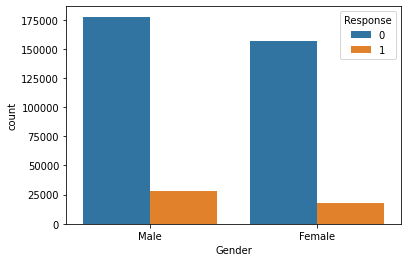

In [13]:
sns.countplot(data=train, x="Gender", hue="Response")

Text(0.5, 1.0, 'test')

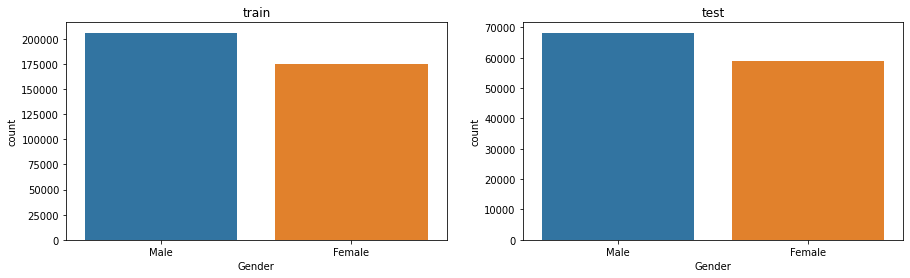

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.countplot(data=train, x="Gender", ax=axes[0]).set_title("train")
sns.countplot(data=test, x="Gender", ax=axes[1]).set_title("test")

In [15]:
df.Gender.value_counts()

Male      274325
Female    233821
Name: Gender, dtype: int64

In [16]:
pd.crosstab(train["Gender"], train["Response"])

Response,0,1
Gender,,
Female,156835,18185
Male,177564,28525


In [17]:
pd.crosstab(train["Gender"], train["Response"], normalize=True) * 100

Response,0,1
Gender,,
Female,41.152269,4.771601
Male,46.591395,7.484735


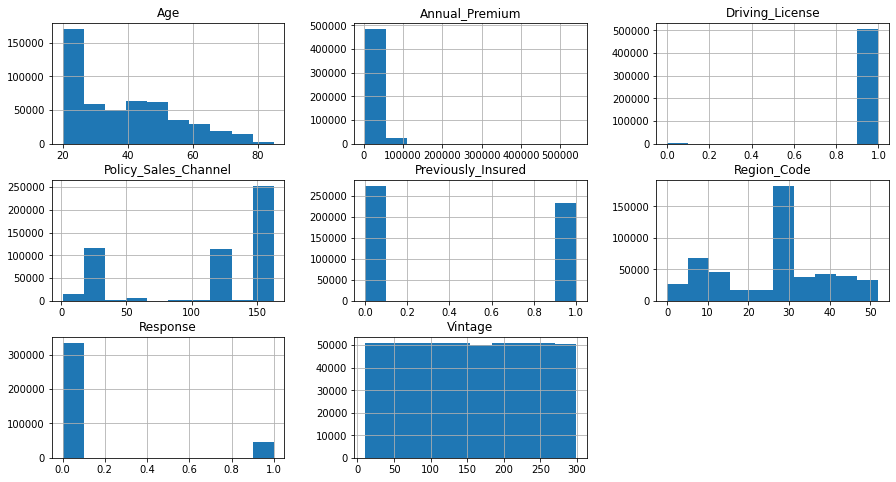

In [18]:
h = df.hist(figsize=(15, 8))

In [19]:
df.dtypes[df.dtypes != np.object].index

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [20]:
num_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel']
num_cols

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel']

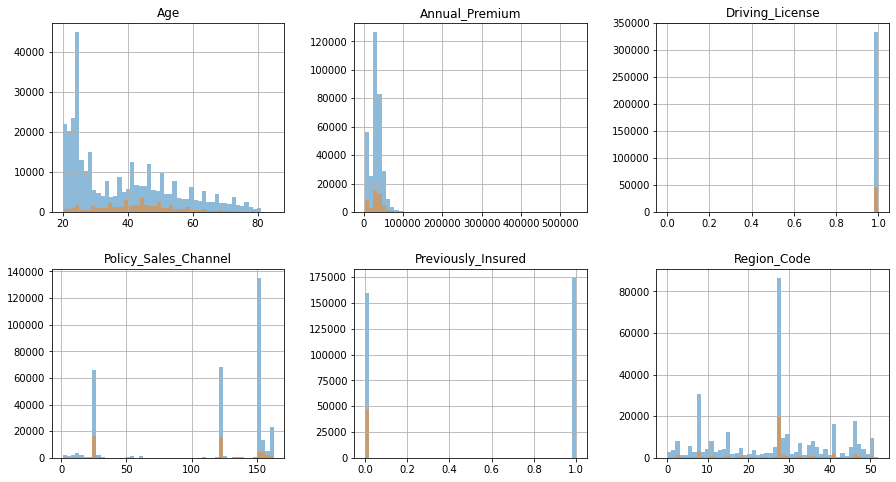

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
h = train.loc[train.Response == 0, num_cols].hist(bins=50, ax=ax, alpha=0.5)
h = train.loc[train.Response == 1, num_cols].hist(bins=50, ax=ax, alpha=0.5)

In [22]:
df.dtypes[df.dtypes == np.object].index

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

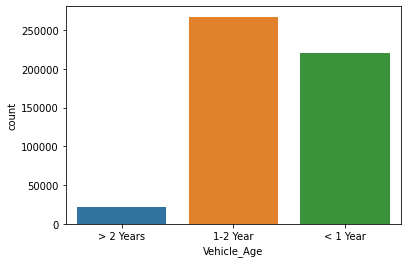

In [23]:
sns.countplot(data=df, x="Vehicle_Age")

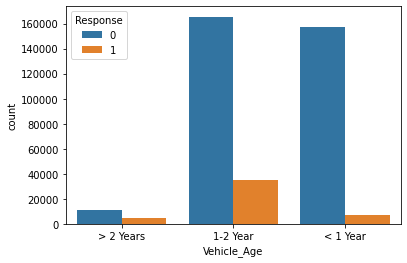

In [24]:
sns.countplot(data=train, x="Vehicle_Age", hue="Response")

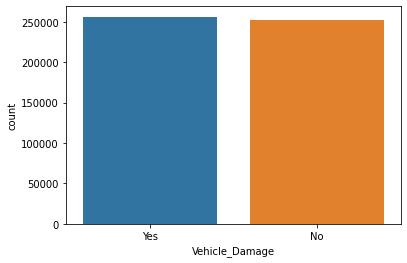

In [25]:
sns.countplot(data=df, x="Vehicle_Damage")

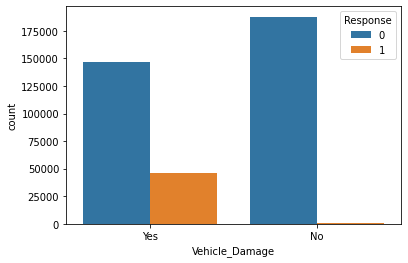

In [26]:
sns.countplot(data=train, x="Vehicle_Damage", hue="Response")

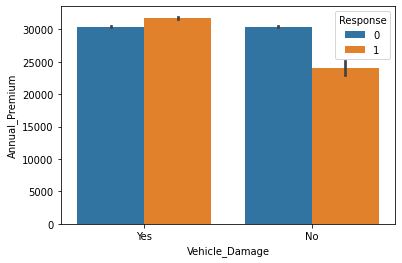

In [28]:

sns.barplot(data=train, x="Vehicle_Damage", y="Annual_Premium", hue="Response")

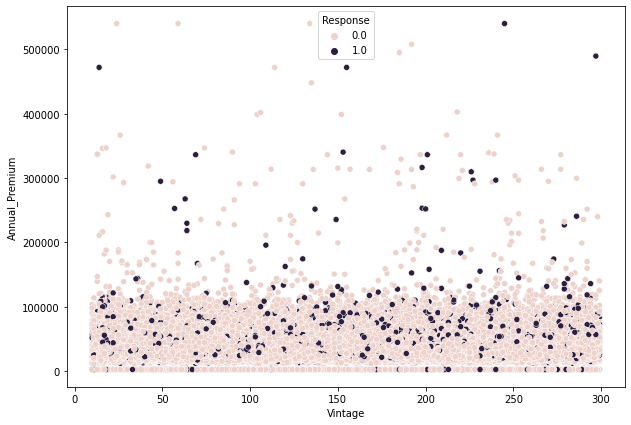

In [34]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Vintage", y="Annual_Premium", hue="Response")